<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here") and choose answers in a [web-form](https://docs.google.com/forms/d/16EfhpDGPrREry0gfDQdRPjoiQX9IumaL2mPR0rcj19k/edit).**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [2]:
data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**First 5 rows**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [5]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [6]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [7]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories


**Another way is to do it with `apply`.**

In [9]:
data["Age_category"] = data["Age"].apply(age_category)

**1. How many men/women were there onboard?**
- 412 men and 479 women
- 314 men and 577 women
- 479 men and 412 women
- 577 men and 314 women

In [10]:
men = data[data["Sex"] == 'male']
women = data[data["Sex"] == 'female']

In [11]:
num_men = men.shape[0]
num_women = women.shape[0]

print(f'men on board: {num_men}\nwomen on board: {num_women}')

men on board: 577
women on board: 314


**2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**
- 104
- 108
- 112
- 125

In [12]:
dist_pclass = data['Pclass'].value_counts().groupby(level=0).sum()
dist_pclass_men = men['Pclass'].value_counts().groupby(level=0).sum()
dist_pclass_women = women['Pclass'].value_counts().groupby(level=0).sum()

print(f'The number of men in Pclass 2: {dist_pclass_men[2]}')

The number of men in Pclass 2: 108


**3. What are median and standard deviation of `Fare`?. Round to two decimals.**
- median is  14.45, standard deviation is 49.69
- median is 15.1, standard deviation is 12.15
- median is 13.15, standard deviation is 35.3
- median is  17.43, standard deviation is 39.1

In [13]:
print(f'The median of "Fare" is {data["Fare"].median()}\nThe std of "Fare" is {data["Fare"].std()}')

The median of "Fare" is 14.4542
The std of "Fare" is 49.693428597180905


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**
- Yes
- No


In [14]:
survivors = data[data['Survived'] == 1]
perished = data[data['Survived'] == 0]
mean_age_of_survivors = survivors['Age'].mean()
mean_age_of_perished = perished['Age'].mean()

print('statement: the mean age of survivors is higher than that of passengers who actually died')
print(f'this is {mean_age_of_survivors > mean_age_of_perished}')

statement: the mean age of survivors is higher than that of passengers who actually died
this is False


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**
- 22.7% among young and 40.6% among old
- 40.6% among young and 22.7% among old
- 35.3% among young and 27.4% among old
- 27.4% among young and  35.3% among old

In [15]:
olds = data[data['Age_category'] == 3.0]
youngs = data[data['Age_category'] == 1.0]

olds_survivors = olds[olds['Survived'] == 1]
youngs_survivors = youngs[youngs['Survived'] == 1]

olds_survivors_propor = olds_survivors.shape[0] / olds.shape[0]
youngs_survivors_propor = youngs_survivors.shape[0] / youngs.shape[0]

print(f'the statement "passengers younger than 30 survived more frequently than those older than 60" is {olds_survivors_propor > youngs_survivors_propor}\n'
    , f'proportion of survivors younger than 30: {olds_survivors_propor:.2f}\n',
    f'proportion of survivors older than 60: {youngs_survivors_propor:.2f}')


the statement "passengers younger than 30 survived more frequently than those older than 60" is False
 proportion of survivors younger than 30: 0.31
 proportion of survivors older than 60: 0.41


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**
- 30.2% among men and 46.2% among women
- 35.7% among men and 74.2% among women
- 21.1% among men and 46.2% among women
- 18.9% among men and 74.2% among women

<Axes: title={'center': 'Survival rate by gender'}, xlabel='Sex'>

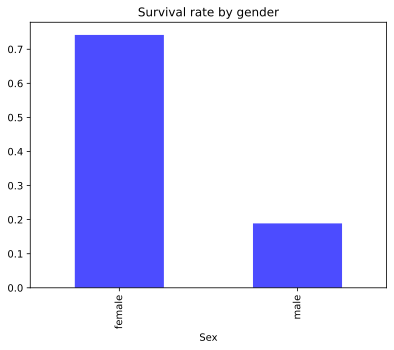

In [16]:
proportions = data.groupby('Sex')['Survived'].mean()
proportions.plot(kind='bar', color='blue', alpha=0.7, title='Survival rate by gender')

**7. What's the most popular first name among male passengers?**
- Charles
- Thomas
- William
- John

In [17]:
def first_name(name):
    return name.split(',')[1].split('.')[1].strip().split(' ')[0]

data['First_name'] = data['Name'].apply(first_name)

In [27]:
first_name_counts = data.groupby('First_name')['First_name'].count().sort_values(
    ascending=False).head(5)
e
print(f'the most popular first name is {first_name_counts.index[0]}')


the most popular first name is William


**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**
- On average, men of 1 class are older than 40
- On average, women of 1 class are older than 40
- Men of all classes are on average older than women of the same class
- On average, passengers ofthe first class are older than those of the 2nd class who are older than passengers of the 3rd class

In [46]:
# how is avg age for men/women dependent on pclass?

correct_statements = ['on average, men of Pclass 1 are older than 40',
                      'men of all classes are on average older than women of the same class',
                      'lower class directly correlates with higher age']

print(f'the correct statements are:')
for statement in correct_statements:
    print(f'    {statement}')

pd.crosstab(
    data['Sex'],
    data['Pclass'],
    values=data['Age'],
    aggfunc='mean'
)


the correct statements are:
    on average, men of Pclass 1 are older than 40
    men of all classes are on average older than women of the same class
    lower class directly correlates with higher age


Pclass,1,2,3
Sex,,,
female,34.61,28.72,21.75
male,41.28,30.74,26.51


## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-practice-analyzing-titanic-passengers) with a [solution](https://www.kaggle.com/kashnitsky/topic-1-practice-solution)
* Topic 1 "Exploratory Data Analysis with Pandas" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)